In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
from src.LE_LoadAndMerge import *
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [282]:
USeast = MultiModelLargeEnsemble(models=['CanESM5','cesm_lens','ACCESS-ESM1-5',
                                         'MIROC6','MPI-ESM1-2-LR','EC-Earth3'],
                                 variable='pr', granularity='day', lat=41.3, lon=-72.5,
                                 bucket='climateai_data_repository', path='tmp/internal_variability',
                                 load=True)

KeyError: '.zmetadata'

In [175]:
USeast.hist.load()

<xarray.Dataset>
Dimensions:    (member: 71, time: 7305, model: 6)
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 62 63 64 65 66 67 68 69 70
  * time       (time) datetime64[ns] 1995-01-01 1995-01-02 ... 2014-12-31
    member_id  (model, member) object 'r10i1p2f1' 'r11i1p1f1' ... 'r19i1p1f1'
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
Data variables:
    tas        (model, member, time) float32 0.1812 4.217 2.264 ... 11.62 5.663
Attributes: (12/49)
    CCCma_model_hash:           Unknown
    CCCma_parent_runid:         p2-pictrl
    CCCma_pycmor_hash:          33c30511acc319a98240633965a04ca99c26427e
    Conventions:                CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:  1850:01:01:00
    activity_id:                CMIP
    ...                         ...
    table_info:                 Creation Date:(20 February 2019) MD5:374fbe5a...
    title:                      CanESM5 output prepared for CMIP6
    tracking_id:                hdl:21.14100/13a818c0-52d1-48e6-b6f5-482ea59b...
    variable_id:                tas
    version:                    v20190429
    version_id:                 v20190429

In [176]:
USeast.future.load()

<xarray.Dataset>
Dimensions:    (member: 58, time: 31411, model: 6)
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 49 50 51 52 53 54 55 56 57
  * time       (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2100-12-31
    member_id  (model, member) object 'r16i1p2f1' 'r10i1p1f1' ... 'r3i1p1f1'
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
Data variables:
    tas        (model, member, time) float32 8.459 14.97 9.194 ... 9.081 13.65
Attributes: (12/48)
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   2015:01:01:00
    YMDH_branch_time_in_parent:  2015:01:01:00
    activity_id:                 ScenarioMIP
    branch_method:               Spin-up documentation
    branch_time_in_child:        60225.0
    ...                          ...
    table_info:                  Creation Date:(20 February 2019) MD5:374fbe5...
    title:                       CanESM5 output prepared for CMIP6
    tracking_id:                 hdl:21.14100/97bf8e66-ae69-4cd1-b64e-92388c3...
    variable_id:                 tas
    version:                     v20190429
    version_id:                  v20190429

In [248]:
hist = USeast.hist.tas
future = USeast.future.tas

In [249]:
hist = hist.rolling(time=5, center=True).mean()
future = future.rolling(time=5, center=True).mean()

In [250]:
# 1 in 10
1 - 0.2 / len(hist.time)

0.9999726214921287

In [251]:
q99 = hist.quantile(0.99997, ('time', 'member'))

In [252]:
q99

<xarray.DataArray 'tas' (model: 6)>
array([30.43997927, 28.19692006, 29.21626736, 30.20646066, 26.13334672,
       29.44912867])
Coordinates:
  * model     (model) <U13 'CanESM5' 'cesm_lens' ... 'MPI-ESM1-2-LR' 'EC-Earth3'
    quantile  float64 1.0

In [253]:
occurance_hist = hist > q99

In [254]:
occurance_hist = occurance_hist.where(np.isfinite(hist), np.NaN)
occurance_hist

<xarray.DataArray 'tas' (model: 6, member: 71, time: 7305)>
array([[[nan, nan,  0., ...,  0., nan, nan],
        [nan, nan,  0., ...,  0., nan, nan],
        [nan, nan,  0., ...,  0., nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan,  0., ...,  0., nan, nan],
        [nan, nan,  0., ...,  0., nan, nan],
        [nan, nan,  0., ...,  0., nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan,  0., ...,  0., nan, nan],
        [nan, nan,  0., ...,  0., nan, nan],
        [nan, nan,  0., ...,  0., nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan,  0., ...,  0., nan, nan],
        [nan, nan,  0., ...,  0., nan, nan],
        [nan, nan,  0., ...,  0., nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan,  0., ...,  0., nan, nan],
        [nan, nan,  0., ...,  0., nan, nan],
        [nan, nan,  0., ...,  0., nan, nan]]])
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 62 63 64 65 66 67 68 69 70
  * time       (time) datetime64[ns] 1995-01-01 1995-01-02 ... 2014-12-31
    member_id  (model, member) object 'r10i1p2f1' 'r11i1p1f1' ... 'r19i1p1f1'
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
    quantile   float64 1.0

In [255]:
occurance_hist.sum('time')

<xarray.DataArray 'tas' (model: 6, member: 71)>
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 2., 0., 0., 0.,
        1., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 1., 0., 0., 0., 5.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 1., 3., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 4., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]])
Coordinates:
  * member     (member) int64 0 1 2 3 4 5 6 7 8 9 ... 62 63 64 65 66 67 68 69 70
    member_id  (model, member) object 'r10i1p2f1' 'r11i1p1f1' ... 'r19i1p1f1'
  * model      (model) <U13 'CanESM5' 'cesm_lens' ... 'EC-Earth3'
    quantile   float64 1.0

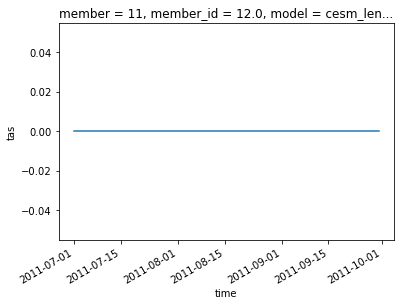

In [256]:
occurance_hist[1, 11].sel(time=slice('2011-07', '2011-09')).plot()

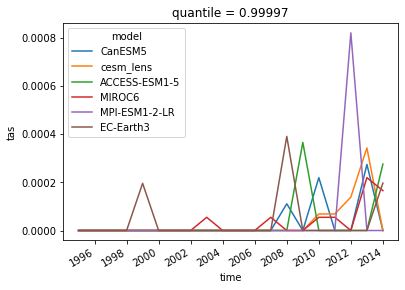

In [257]:
occurance_hist.resample(time='AS').mean().mean('member').plot(hue='model');

In [258]:
occurance_future = future > q99
occurance_future = occurance_future.where(np.isfinite(future), np.NaN)

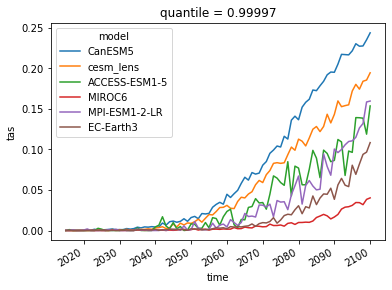

In [259]:
occurance_future.mean('member').resample(time='AS').mean().plot(hue='model');

In [260]:
occurance_future_10yr = occurance_future.resample(time='AS').mean().rolling(
    time=10, center=True).mean()

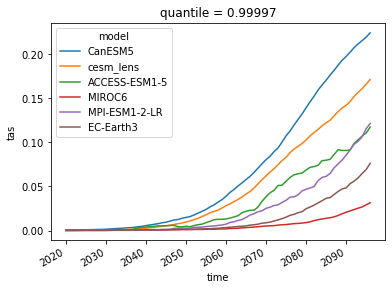

In [261]:
occurance_future_10yr.mean('member').plot(hue='model');

In [262]:
import seaborn as sns

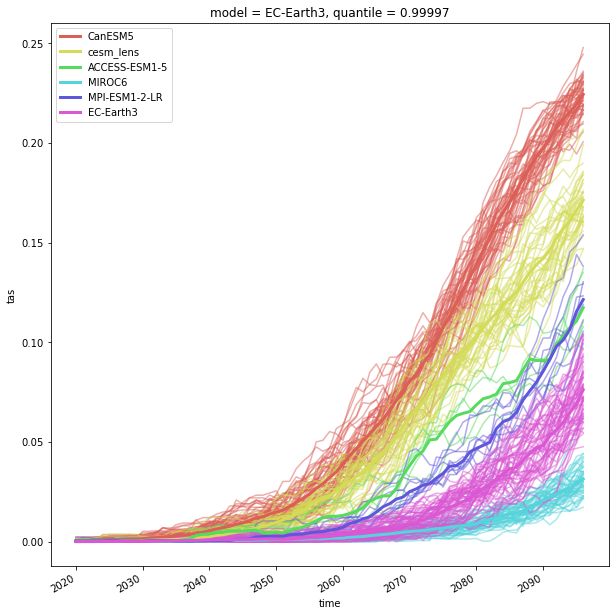

In [263]:
plt.figure(figsize=(10, 10))
colors = sns.color_palette("hls", len(occurance_future_10yr.model))
for i, model in enumerate(occurance_future_10yr.model):
    m = occurance_future_10yr.sel(model=model)
    m.plot(hue='member', c=colors[i], add_legend=False, alpha=0.5)
    m.mean('member').plot(c=colors[i], lw=3, label=str(model.values), zorder=10)
plt.legend()

In [264]:
I = occurance_future_10yr.var('member').mean('model')

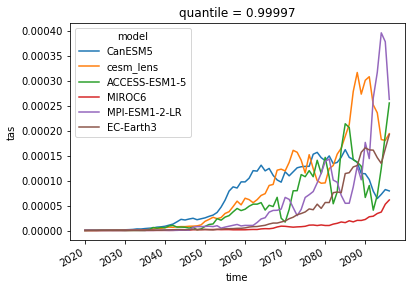

In [271]:
occurance_future_10yr.var('member').plot(hue='model');

In [265]:
M = occurance_future_10yr.mean('member').var('model')

In [266]:
T = I + M
I_frac = I/T
M_frac = M/T

In [273]:
S = occurance_future_10yr.mean(('model', 'member')) - occurance_hist.mean()

In [267]:
max_improvement = 1 - np.sqrt(I + 0.0* M) / np.sqrt(T) 

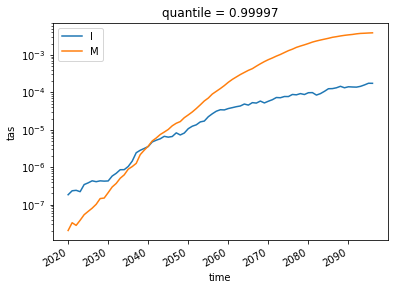

In [281]:
I.plot(label='I')
M.plot(label='M')
plt.legend();
plt.yscale('log')

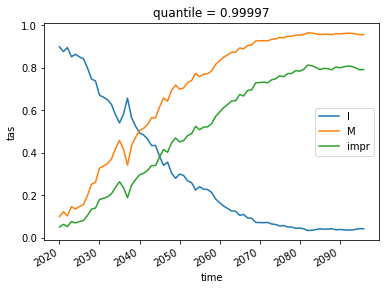

In [269]:
I_frac.plot(label='I')
M_frac.plot(label='M')
max_improvement.plot(label = 'impr')
plt.legend();

In [275]:
SNR_T = S / np.sqrt(T)
SNR_I = S / np.sqrt(I)

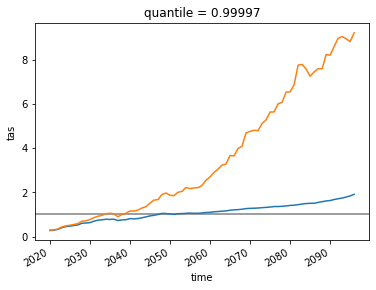

In [279]:
SNR_T.plot()
SNR_I.plot()
plt.axhline(1, zorder=0.1, c='0.5')